# Project : Electronics Store Sales Analysis 

# Introduction

Welcome to my very first Data Analysis Project. In this project I am going to analyze and answer business questions about 12 months worth of sales data. The data contains store purchases broken down by month, product type, cost, etc. This project is made for praticing purpose only.

# I. Accessing, cleaning and transforming data

In [1]:
#Import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import itertools as ite
import numpy as np

## Merging files

In [2]:
#Cheking file size ( columns, rows, etc.)
df = pd.read_csv("./Sales Project/Data/SalesAnalysis/Sales_Data/Sales_April_2019.csv")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [3]:
#Merging 12 files to 1:

files = [file for file in os.listdir('./Sales Project/Data/SalesAnalysis/Sales_Data/')]
yearly_df=pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales Project/Data/SalesAnalysis/Sales_Data/"+file)
    yearly_df=pd.concat([yearly_df,df])    
yearly_df.to_csv("yearly_data.csv", index=False)

#Read in updated dataframe
yearly_df=pd.read_csv("yearly_data.csv")
yearly_df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Cleaning data

In [4]:
# Identify null values
nullcheck=df.isnull().sum()
nullcheck

Order ID            40
Product             40
Quantity Ordered    40
Price Each          40
Order Date          40
Purchase Address    40
dtype: int64

In [5]:
# As it represents a small percentage, and with an entire row of missing data, we should delete all null values
yearly_df = yearly_df.dropna(how="all").reset_index(drop=True)

As I encountered data type changing errors later on, I checked again and found that some rows contain our header instead of data, below is the way I identify them

In [6]:
header_rows = pd.DataFrame
header_rows = yearly_df.loc[yearly_df['Order ID'] == 'Order ID']
header_rows

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
517,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1146,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1152,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2869,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2884,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184624,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185009,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186019,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186088,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
#Drop header rows
yearly_df = yearly_df.drop(yearly_df[yearly_df['Order ID'] == 'Order ID'].index)
yearly_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [8]:
# Changing data types
yearly_df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [9]:
yearly_df['Order Date'] = pd.to_datetime(yearly_df['Order Date'], errors='coerce', format='%m/%d/%y %H:%M')
yearly_df[["Order ID", "Quantity Ordered","Price Each"]] = yearly_df[["Order ID", "Quantity Ordered","Price Each"]].apply(pd.to_numeric)


# II. Analyzing data

## Question 1: What was the best month for sales, for how much earning?

In [10]:
#Create Month column
yearly_df['Month'] = pd.DatetimeIndex(yearly_df['Order Date']).month
yearly_df['Month'] = yearly_df['Month'].astype('int32')
yearly_df.head()
#Create Sales column
yearly_df['Sales'] = yearly_df['Price Each'] * yearly_df['Quantity Ordered']

In [11]:
month_summarize = pd.DataFrame
month_summarize = yearly_df.groupby('Month', as_index=False).agg({"Sales": "sum"})
month_summarize.sort_values('Sales',ascending=False)


,Month,Sales
11,12,4.613443e+06
9,10,3.736727e+06
3,4,3.390670e+06
10,11,3.199603e+06
4,5,3.152607e+06
2,3,2.807100e+06
6,7,2.647776e+06
5,6,2.577802e+06
7,8,2.244468e+06
1,2,2.202022e+06


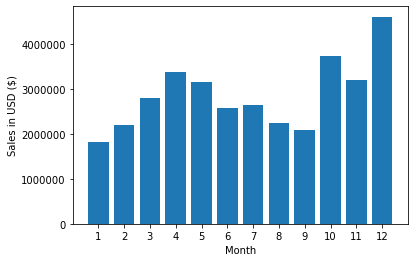

In [12]:
plt.bar(month_summarize['Month'],month_summarize['Sales'])
plt.xticks(month_summarize['Month']) # Showing all the values of x, which is Month in this case.
plt.xlabel('Month')
plt.ylabel('Sales in USD ($)')
plt.ticklabel_format(style='plain') # Avoid scientifique notation such as 1e6
plt.show()

### Q1.Answer: December has the highest sales record, with more than 4.6 millions on Revenu.

## Question 2: Which city with most sale?

In [13]:
#Create City column from Address column
yearly_df[['Street','City','Code Postal']]= yearly_df['Purchase Address'].str.split(', ', expand=True)

In [14]:
yearly_df[['Street','City','Code Postal']] = yearly_df[["Street","City","Code Postal"]].astype("string")

In [15]:
#Calculating Sales for each city
city_summarize = pd.DataFrame
city_summarize = yearly_df.groupby('City', as_index=False).agg({"Sales": "sum"})
city_summarize.sort_values('Sales',ascending=False)

,City,Sales
7,San Francisco,8.262204e+06
4,Los Angeles,5.452571e+06
5,New York City,4.664317e+06
2,Boston,3.661642e+06
0,Atlanta,2.795499e+06
3,Dallas,2.767975e+06
8,Seattle,2.747755e+06
6,Portland,2.320491e+06
1,Austin,1.819582e+06


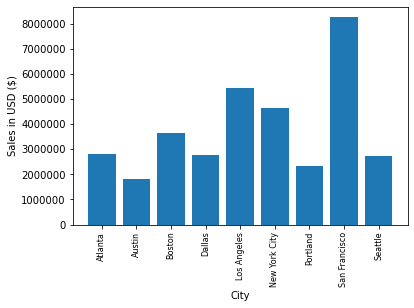

In [16]:
#Graph
plt.bar(city_summarize['City'],city_summarize['Sales'])
plt.xticks(city_summarize['City'], rotation = 'vertical', size=8) #vertical make long text become visible
plt.xlabel('City')
plt.ylabel('Sales in USD ($)')
plt.ticklabel_format(axis='y', style='plain') # Avoid scientifique notation such as 1e6
plt.show()

### Q2.Answer: We sold the most in San Francisco, with a value of more than 8.2 millions $

## Question 3: What time should we display ads to maximize likelihood of customer's buying our products?

Hypothetically, advertising in the same time frame when people shop the most tend to increase our sales. I am going to find what time of day people shop the most at first, then interprete it afterward.

In [17]:
yearly_df['Hour'] = pd.DatetimeIndex(yearly_df['Order Date']).hour
yearly_df['Count'] = 1

Now we have two approach for this problem:
- A1: The result should be represent based on number of purchase orders (more intuitive)
- A2: The result should be represent based on sales

#### A1

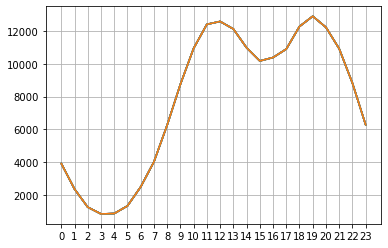

In [18]:
hours = [hour for hour, df in yearly_df.groupby('Hour')]

plt.plot(hours, yearly_df.groupby(['Hour']).count())
plt.xticks(hours,size=10)
plt.grid()
plt.show()

#### A2

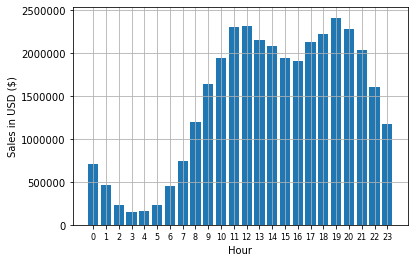

In [19]:
#Sales each hour
sales_by_hour = pd.DataFrame
sales_by_hour = yearly_df.groupby('Hour', as_index=False).agg({"Sales": "sum"})

#Graph
plt.bar(sales_by_hour['Hour'],sales_by_hour['Sales'])
plt.xticks(sales_by_hour['Hour'], size=8)
plt.xlabel('Hour')
plt.ylabel('Sales in USD ($)')
plt.ticklabel_format(axis='y', style='plain') # Avoid scientifique notation such as 1e6
plt.grid()
plt.show()

Conclusion: Seems like both approach bring us to the same result. In the interpretation below we will use A1's graph since it's a bit easier to visualize
<br>00:00 - 08:00: Not recommended to advertise (Lowest sales/order counts due to sleeping time and start of working time)
<br>08:00 - 10:00: Acceptable for advertising (Counts >6k )
<br>10:00 - 21:00: Good for advertising (>10k) in which:
    <br>* 11:00 - 13:00: Best time for advertising (Counts >12k)
    <br>* 18:00 - 20:00: Best time for advertising (Counts >12k)
<br>21:00 - 23:00: Acceptable for advertising (Counts >6k)

### Q3.Answer: In short, 12 A.M. and 7 P.M. are the best time to display ads.

## Question 4: What product sold the most? Relation between the result and product price?

As we are analysing products from differents categories, summarising the data by Sales seems not appropriate. Approach the question based on the quantity ordered will be a better idea

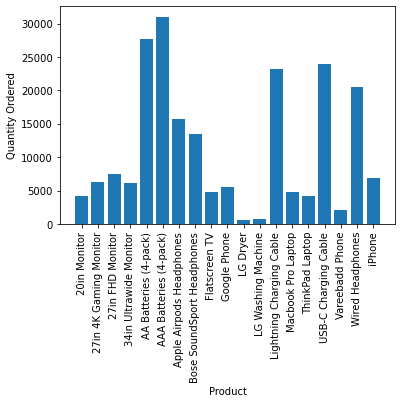

In [21]:
#Summarize data by products
product_group = yearly_df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
prices = product_group.mean()['Price Each']

#Visualize the result
products = [product for product, df in product_group]
            
plt.bar(products,quantity_ordered)
plt.xticks(products, rotation = 'vertical', size=10)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

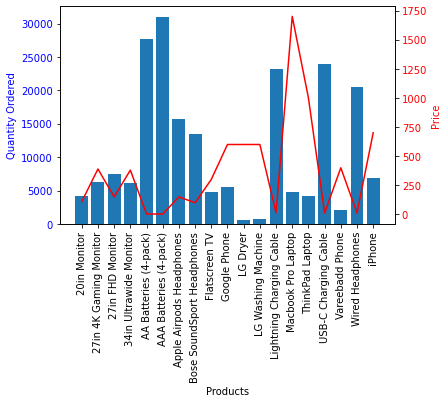

In [22]:
#Plot graph with 2 y axes
fig, ax1 = plt.subplots()

#Plot bars
ax1.bar(products, quantity_ordered)
plt.xticks(products, rotation = 'vertical', size=10)
ax1.set_xlabel('Products')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Quantity Ordered', color='b')
[tl.set_color('b') for tl in ax1.get_yticklabels()]

#Set up ax2 to be the second y axis with x shared
ax2 = ax1.twinx()
#Plot a line
ax2.plot(prices, 'r-')

# Make the y-axis label and tick labels match the line color.
ax2.set_ylabel('Price', color='r')
[tl.set_color('r') for tl in ax2.get_yticklabels()]

plt.show()

As a logical result, the quantity often goes high with low-price items, and vice versa, except
for the case of Macbook Pro.
If we break the sales quantity down by product category, we have Batteries is the best seller
category, followed by Changing Cables and Headphones.
Apple products are attractive to customer as usual, despite its expensiveness.


### Q4.Answer : Batteries are our best seller, followed by Cables.  Normally, the higher the price, the lower the sales, with an exception for Apple products.

## Question 5: What products are most often sold together?

This is a common question in every Online shop. Finding the answer to this question improve the way we recommend offers for our customers (the result will be used on section "People often buy" section in online shopping website) On the other hand, knowing which pairs of product are often sold together improve our approach of promotions, such as buying one product to get a reduction for another product of a pair.

In [23]:
df1 = yearly_df[yearly_df['Order ID'].duplicated(keep=False)] #Drop 1-item order

df1['PList'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) #PList=Product List

df1 = df1[['Order ID','PList']].drop_duplicates()
df1

<ipython-input-23-f929ec552144>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['PList'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) #PList=Product List


,Order ID,PList
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186237,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186239,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186247,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186259,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [24]:
from collections import Counter

count=Counter()

for row in df1['PList']:
    row_list=row.split(',')
    count.update(Counter(ite.combinations(row_list,2)))
count.most_common(10)


[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

We have 2 best pairs of products which are iPhone-Lightning Charing Cable and Google Phone-USC-C Charing Cable. Other results on the list could also be useful for our recommendation system. For example when a customer has an iPhone in his/her basket, we should probably recommend him/her to buy a Lightning Charging Cable, a Wired Headphones or a Apple Airpods Headphones, which are 3 items often being paired with an iPhone.

### Q5.Answer: We have now a list of pair of products to recommend to our customer or to improve our promotion campaign.

# Conclusion

This is the end of my Sales Analysis Project. 
Depend on bussiness strategy and marketing campaign, many more questions could be raised and be solved using this dataset, such as which product is the best seller in each city, or which pair of products is often sold in a certain city, etc. 
Next step is making a report of our analysis. How could we communicate the result of our analysis to our team or to our boss?

Reference: Solving real world data science tasks with Python Pandas! - Keith Galli